In [ ]:
'''
Clasificación de matrices
'''
# Usaremos un diccionario para clasificar y contar la cantidad de ocurrencias de cada caso.
matrix_dict = {'saddle':0, 'sink':0, 'spiral sink':0, 'spiral source':0, 'source':0,
               'unstable fixed':0, 'stable fixed':0, ' degenerate sink':0, 'degenerate source':0,
               'center':0, 'uniform motion':0}

# Esta función clasifica cada matriz y retorna su tipo
def classifier(matrix):
    tr, det = np.trace(matrix), np.linalg.det(matrix)
    delta = tr**2 - 4*det

    if (det < 0): res = 'saddle'
    elif (tr < 0) and (delta > 0): res = 'sink'
    elif (tr < 0) and (delta < 0): res = 'spiral sink'
    elif (tr > 0) and (delta < 0): res = 'spiral source'
    elif (tr > 0) and (delta > 0): res = 'source'

    return res, tr, det

'''
Graficación
'''
def prescatter(fig,xlb='x',ylb='y', titl='y v x'):
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    fig.grid(ls='--', zorder=0)
    fig.set_title(titl)
    fig.set_ylabel(ylb)
    fig.set_xlabel(xlb)
    fig.legend()

def addscatter(type, tr, det, fig):
    if type == 'saddle': col = 'xkcd:dark violet'
    elif type == 'sink': col = 'xkcd:dark red'
    elif type == 'spiral sink': col = 'xkcd:pale orange'
    elif type == 'spiral source': col = 'xkcd:green blue'
    elif type == 'source': col = 'xkcd:dark blue'
    fig.plot(tr,det, marker='o', color=col, markersize=2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


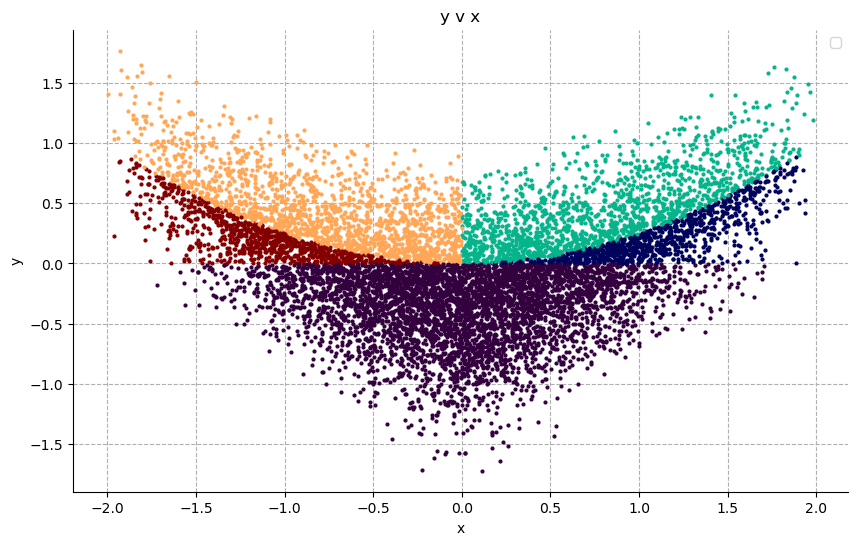

In [ ]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
prescatter(ax)

for i in range(10000):
    matrix = np.random.uniform(low=-1, high=1, size=(2, 2)) # a diferencia de random.random [-1,1), este usa [-1,1]
    matrix_type, tr, det = classifier(matrix)
    matrix_dict[matrix_type] +=1
    addscatter(matrix_type, tr, det, ax)